In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

## Generate Some Data

### $y_t = 50 + 0.4\varepsilon_{t-1} + 0.3\varepsilon_{t-2} + \varepsilon_t$
### $\varepsilon_t \sim N(0,1)$

In [438]:
errors = np.random.normal(0, 1, 400)

In [439]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [440]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [441]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

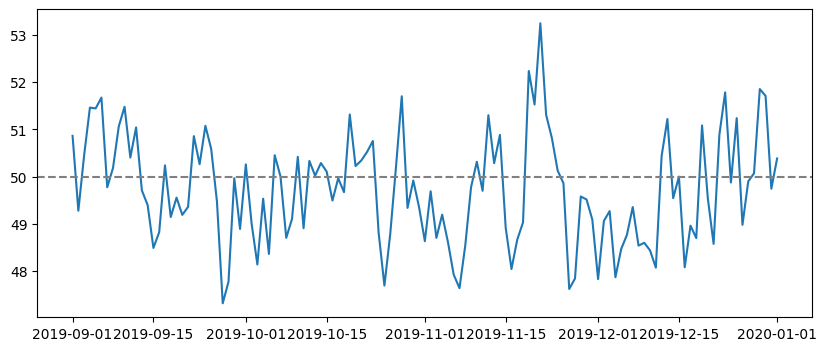

In [442]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

# ACF

<BarContainer object of 10 artists>

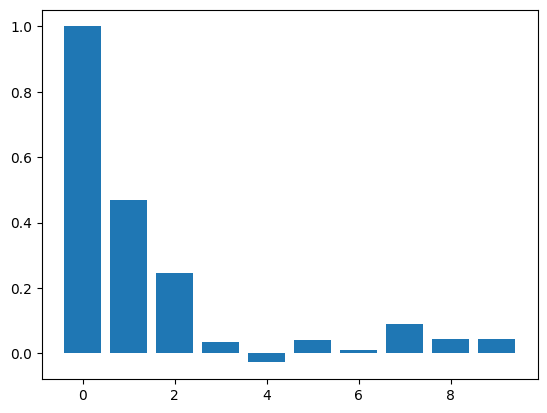

In [443]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

# PACF

<BarContainer object of 21 artists>

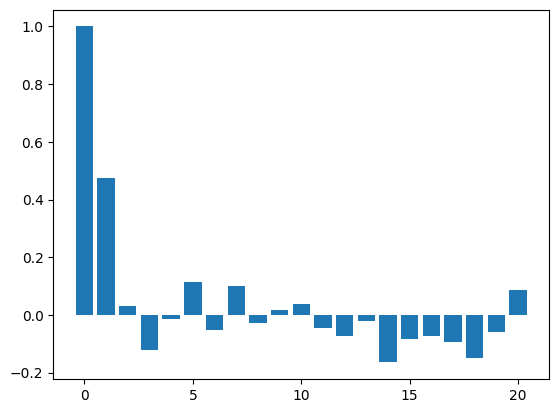

In [444]:
pacf_vals = pacf(series)
num_lags = len(pacf_vals)
plt.bar(range(num_lags), pacf_vals[:num_lags])

# Get training and testing sets

In [445]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

# Fit ARIMA Model

In [446]:
#create the model
model = ARIMA(train_data, order=(0,0,2))

In [447]:
#fit the model
model_fit = model.fit()

In [448]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -173.011
Date:                Sat, 09 Mar 2024   AIC                            354.021
Time:                        03:56:49   BIC                            365.205
Sample:                    09-01-2019   HQIC                           358.563
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7402      0.164    304.079      0.000      49.420      50.061
ma.L1          0.4532      0.089      5.116      0.000       0.280       0.627
ma.L2          0.3112      0.084      3.697      0.0

# Predicted Model:
# $\hat{y}_t = 49.74 + 0.45\varepsilon_{t-1} + 0.31\varepsilon_{t-2}$

In [449]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [450]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [451]:
residuals = test_data - predictions

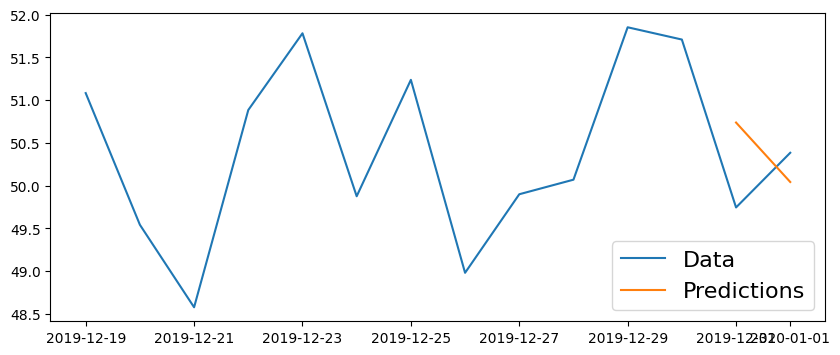

In [452]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [453]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0134


In [454]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.7428647275291761
